# Initial Data Analysis

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

In [2]:
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

## Data Importing

In [3]:
train_df = pd.read_csv('../data/train_LZdllcl.csv')
test_df = pd.read_csv('../data/test_2umaH9m.csv')
sub_df = pd.read_csv('../data/sample_submission_M0L0uXE.csv')

In [4]:
train_df.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [5]:
train_df.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [8]:
train_df.set_index('employee_id', inplace=True)
test_df.set_index('employee_id', inplace=True)

In [9]:
train_df.head()

department     region         education gender  \
employee_id                                                          
65438        Sales & Marketing   region_7  Master's & above      f   
65141               Operations  region_22        Bachelor's      m   
7513         Sales & Marketing  region_19        Bachelor's      m   
2542         Sales & Marketing  region_23        Bachelor's      m   
48945               Technology  region_26        Bachelor's      m   

            recruitment_channel  no_of_trainings  age  previous_year_rating  \
employee_id                                                                   
65438                  sourcing                1   35                   5.0   
65141                     other                1   30                   5.0   
7513                   sourcing                1   34                   3.0   
2542                      other                2   39                   1.0   
48945                     other                1   45                   3.0   

             length_of_service  KPIs_met >80%  awards_won?  \
employee_id                                                  
65438                        8              1            0   
65141                        4              0            0   
7513                         7              0            0   
2542                        10              0            0   
48945                        2              0            0   

             avg_training_score  is_promoted  
employee_id                                   
65438                        49            0  
65141                        60            0  
7513                         50            0  
2542                         50            0  
48945                        73            0

### Department Field

In [10]:
train_df.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [11]:
train_df.department.value_counts().sort_index().index

Index(['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
       'R&D', 'Sales & Marketing', 'Technology'],
      dtype='object')

In [12]:
train_df[train_df['is_promoted'] == 1]['department'].value_counts().tolist()
train_df[train_df['is_promoted'] == 0]['department'].value_counts().tolist()

[15627, 10325, 6450, 6370, 4840, 2330, 2282, 986, 930]

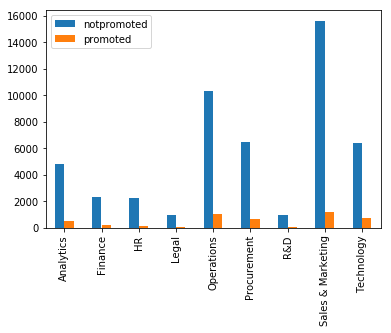

In [13]:
promoted = train_df[train_df['is_promoted'] == 1]['department'].value_counts().sort_index().tolist()
unpromoted = train_df[train_df['is_promoted'] == 0]['department'].value_counts().sort_index().tolist()
index = ['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement', 
         'R&D', 'Sales & Marketing', 'Technology']
df = pd.DataFrame({'notpromoted': unpromoted, 'promoted': promoted}, index=index)
ax = df.plot.bar(rot=90)

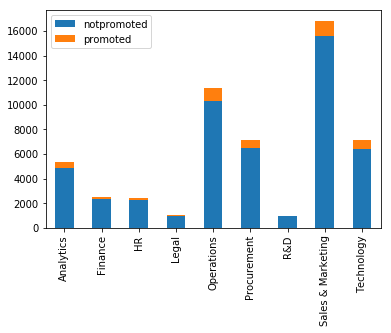

In [14]:
promoted = train_df[train_df['is_promoted'] == 1]['department'].value_counts().sort_index().tolist()
unpromoted = train_df[train_df['is_promoted'] == 0]['department'].value_counts().sort_index().tolist()
index = ['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement', 
         'R&D', 'Sales & Marketing', 'Technology']
df = pd.DataFrame({'notpromoted': unpromoted, 'promoted': promoted}, index=index)
ax = df.plot.bar(rot=90, stacked = True)

In [15]:
department_classes = ['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement', 'R&D', 
           'Sales & Marketing', 'Technology']
department_teams = ['department_analytics', 'department_finance', 'department_hr', 'department_legal', 
                    'department_operations', 'department_procurement', 'department_r_and_d', 
                    'department_sales_and_martketing', 'department_technology']

# For Training Data
df1 = pd.DataFrame(label_binarize(train_df['department'], 
                                  classes = department_classes), 
                   columns = department_teams)
index = train_df.index
df1.set_index(index, inplace = True)
train_df[department_teams] = df1
train_df.drop('department', axis = 1, inplace = True)

# For Testing Data
df2 = pd.DataFrame(label_binarize(test_df['department'], 
                                  classes = department_classes), 
                   columns = department_teams)
index = test_df.index
df2.set_index(index, inplace = True)
test_df[department_teams] = df2
test_df.drop('department', axis = 1, inplace = True)

### Region

In [16]:
train_df.region.unique().sort

<function ndarray.sort>

In [17]:
train_df.region.value_counts().sort_index().index

Index(['region_1', 'region_10', 'region_11', 'region_12', 'region_13',
       'region_14', 'region_15', 'region_16', 'region_17', 'region_18',
       'region_19', 'region_2', 'region_20', 'region_21', 'region_22',
       'region_23', 'region_24', 'region_25', 'region_26', 'region_27',
       'region_28', 'region_29', 'region_3', 'region_30', 'region_31',
       'region_32', 'region_33', 'region_34', 'region_4', 'region_5',
       'region_6', 'region_7', 'region_8', 'region_9'],
      dtype='object')

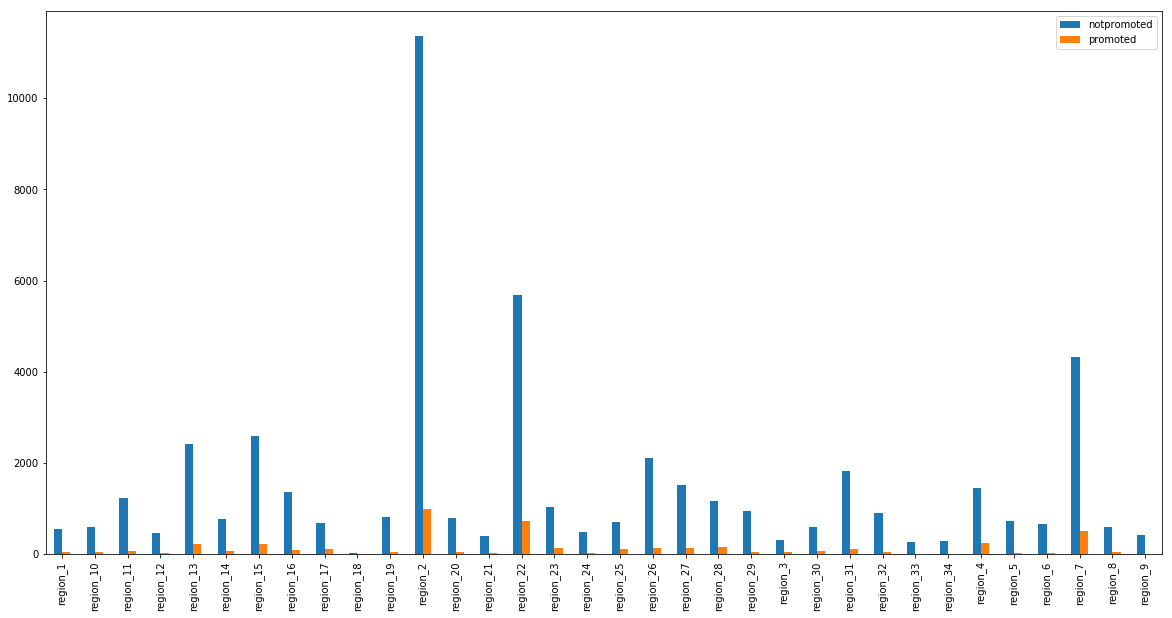

In [18]:
promoted = train_df[train_df['is_promoted'] == 1]['region'].value_counts().sort_index().tolist()
unpromoted = train_df[train_df['is_promoted'] == 0]['region'].value_counts().sort_index().tolist()
index = ['region_1', 'region_10', 'region_11', 'region_12', 'region_13',
       'region_14', 'region_15', 'region_16', 'region_17', 'region_18',
       'region_19', 'region_2', 'region_20', 'region_21', 'region_22',
       'region_23', 'region_24', 'region_25', 'region_26', 'region_27',
       'region_28', 'region_29', 'region_3', 'region_30', 'region_31',
       'region_32', 'region_33', 'region_34', 'region_4', 'region_5',
       'region_6', 'region_7', 'region_8', 'region_9']
df = pd.DataFrame({'notpromoted': unpromoted, 'promoted': promoted}, index=index)
ax = df.plot.bar(rot=90, figsize = (20, 10))

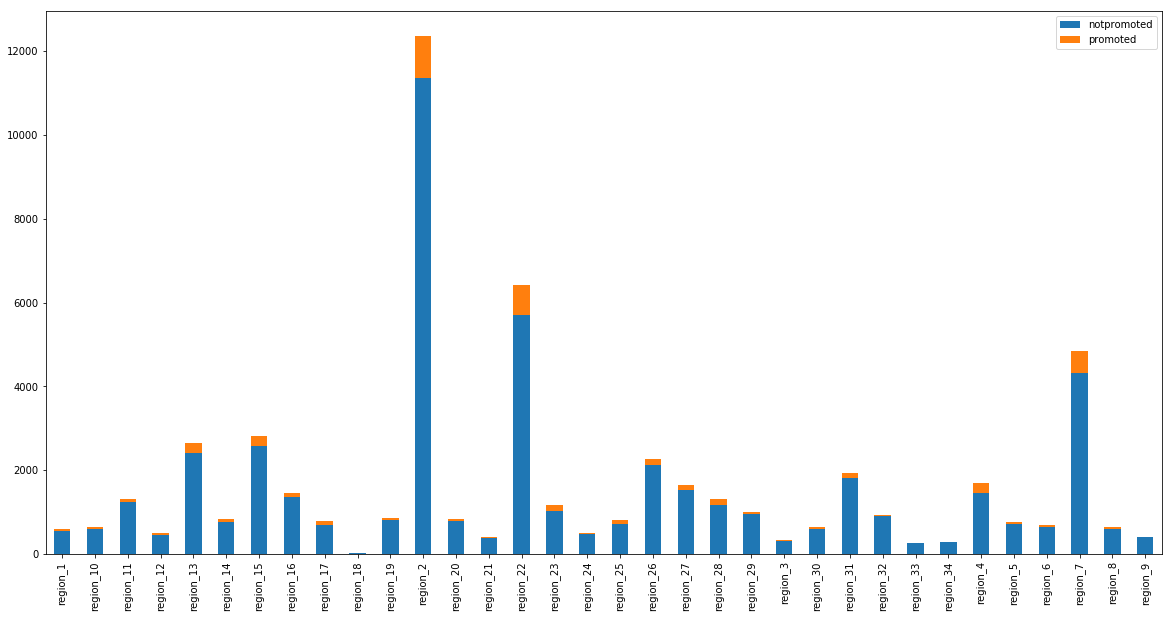

In [19]:
promoted = train_df[train_df['is_promoted'] == 1]['region'].value_counts().sort_index().tolist()
unpromoted = train_df[train_df['is_promoted'] == 0]['region'].value_counts().sort_index().tolist()
index = ['region_1', 'region_10', 'region_11', 'region_12', 'region_13',
       'region_14', 'region_15', 'region_16', 'region_17', 'region_18',
       'region_19', 'region_2', 'region_20', 'region_21', 'region_22',
       'region_23', 'region_24', 'region_25', 'region_26', 'region_27',
       'region_28', 'region_29', 'region_3', 'region_30', 'region_31',
       'region_32', 'region_33', 'region_34', 'region_4', 'region_5',
       'region_6', 'region_7', 'region_8', 'region_9']
df = pd.DataFrame({'notpromoted': unpromoted, 'promoted': promoted}, index=index)
ax = df.plot.bar(rot=90, figsize = (20, 10), stacked = True)

In [20]:
region_classes = ['region_1', 'region_10', 'region_11', 'region_12', 'region_13',
                       'region_14', 'region_15', 'region_16', 'region_17', 'region_18',
                       'region_19', 'region_2', 'region_20', 'region_21', 'region_22',
                       'region_23', 'region_24', 'region_25', 'region_26', 'region_27',
                       'region_28', 'region_29', 'region_3', 'region_30', 'region_31',
                       'region_32', 'region_33', 'region_34', 'region_4', 'region_5',
                       'region_6', 'region_7', 'region_8', 'region_9']

# For Training Data
df1 = pd.DataFrame(label_binarize(train_df['region'], 
                                  classes = region_classes), 
                   columns = region_classes)
index = train_df.index
df1.set_index(index, inplace = True)
train_df[region_classes] = df1
train_df.drop('region', axis = 1, inplace = True)

# For Testing Data
df2 = pd.DataFrame(label_binarize(test_df['region'], 
                                  classes = region_classes), 
                   columns = region_classes)
index = test_df.index
df2.set_index(index, inplace = True)
test_df[region_classes] = df2
test_df.drop('region', axis = 1, inplace = True)

### Education

In [21]:
train_df.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [22]:
test_df.education.value_counts()

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

In [23]:
train_df.education.isnull().sum()

2409

In [24]:
test_df.education.isnull().sum()

1034

In [25]:
train_df.education.replace({np.NaN: 'Unknown'}, inplace = True)
test_df.education.replace({np.NaN: 'Unknown'}, inplace = True)

In [26]:
train_df.education.value_counts()

Bachelor's          36669
Master's & above    14925
Unknown              2409
Below Secondary       805
Name: education, dtype: int64

In [27]:
test_df.education.value_counts()

Bachelor's          15578
Master's & above     6504
Unknown              1034
Below Secondary       374
Name: education, dtype: int64

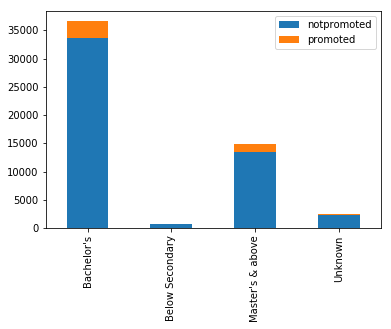

In [28]:
promoted = train_df[train_df['is_promoted'] == 1]['education'].value_counts().sort_index().tolist()
unpromoted = train_df[train_df['is_promoted'] == 0]['education'].value_counts().sort_index().tolist()
index = ["Bachelor's", "Below Secondary", "Master's & above", "Unknown"]
df = pd.DataFrame({'notpromoted': unpromoted, 'promoted': promoted}, index=index)
ax = df.plot.bar(rot=90, stacked = True, figsize = (6, 4))

In [29]:
education_classes = ["Bachelor's", "Below Secondary", "Master's & above", "Unknown"]

# For Training Data
df1 = pd.DataFrame(label_binarize(train_df['education'], 
                                  classes = education_classes), 
                   columns = education_classes)
index = train_df.index
df1.set_index(index, inplace = True)
train_df[education_classes] = df1
train_df.drop('education', axis = 1, inplace = True)

# For Testing Data
df2 = pd.DataFrame(label_binarize(test_df['education'], 
                                  classes = education_classes), 
                   columns = education_classes)
index = test_df.index
df2.set_index(index, inplace = True)
test_df[education_classes] = df2
test_df.drop('education', axis = 1, inplace = True)

### Gender

In [30]:
train_df.gender.unique()

array(['f', 'm'], dtype=object)

In [31]:
train_df.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [32]:
train_df.gender.value_counts().sort_index()

f    16312
m    38496
Name: gender, dtype: int64

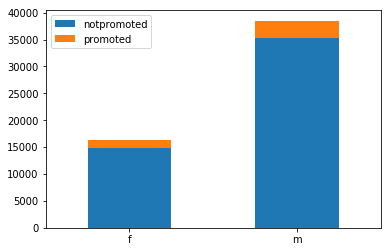

In [33]:
promoted = train_df[train_df['is_promoted'] == 1]['gender'].value_counts().sort_index().tolist()
unpromoted = train_df[train_df['is_promoted'] == 0]['gender'].value_counts().sort_index().tolist()
index = ["f", "m"]
df = pd.DataFrame({'notpromoted': unpromoted, 'promoted': promoted}, index=index)
ax = df.plot.bar(rot=0, stacked = True, figsize = (6, 4))

In [34]:
le = LabelEncoder()
le.fit(["f", "m"])

# For Training Data
df = pd.DataFrame(le.transform(train_df['gender']), columns = ['gender'])
index = train_df.index
df.set_index(index, inplace = True)
train_df['gender'] = df

# For Testing Data
df = pd.DataFrame(le.transform(test_df['gender']), columns = ['gender'])
index = test_df.index
df.set_index(index, inplace = True)
test_df['gender'] = df

### Recruitment Channel

In [35]:
train_df.recruitment_channel.unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [36]:
train_df.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [37]:
train_df.recruitment_channel.value_counts().sort_index()

other       30446
referred     1142
sourcing    23220
Name: recruitment_channel, dtype: int64

In [38]:
train_df.recruitment_channel.value_counts().sort_index().index

Index(['other', 'referred', 'sourcing'], dtype='object')

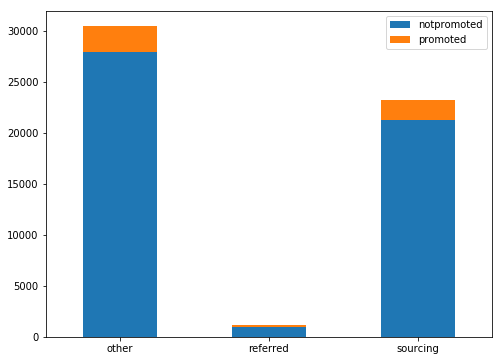

In [39]:
promoted = train_df[train_df['is_promoted'] == 1]['recruitment_channel'].value_counts().sort_index().tolist()
unpromoted = train_df[train_df['is_promoted'] == 0]['recruitment_channel'].value_counts().sort_index().tolist()
index = ['other', 'referred', 'sourcing']
df = pd.DataFrame({'notpromoted': unpromoted, 'promoted': promoted}, index=index)
ax = df.plot.bar(rot=0, stacked = True, figsize = (8, 6))

In [40]:
rc_classes = ['other', 'referred', 'sourcing']

# For Training Data
df1 = pd.DataFrame(label_binarize(train_df['recruitment_channel'], 
                                  classes = rc_classes), 
                   columns = rc_classes)
index = train_df.index
df1.set_index(index, inplace = True)
train_df[rc_classes] = df1
train_df.drop('recruitment_channel', axis = 1, inplace = True)

# For Testing Data
df2 = pd.DataFrame(label_binarize(test_df['recruitment_channel'], 
                                  classes = rc_classes), 
                   columns = rc_classes)
index = test_df.index
df2.set_index(index, inplace = True)
test_df[rc_classes] = df2
test_df.drop('recruitment_channel', axis = 1, inplace = True)

### Previous Year Rating

In [41]:
train_df['rating_missing'] = [1 if np.isnan(i) else 0 for i in train_df.previous_year_rating]
test_df['rating_missing'] = [1 if np.isnan(i) else 0 for i in test_df.previous_year_rating]

In [ ]:
new_df = pd.read_csv('../data/train_LZdllcl.csv')

In [ ]:
new_df.groupby('department')['previous_year_rating'].mean()

In [ ]:
new_df = pd.read_csv('../data/test_2umaH9m.csv')
new_df.groupby('department')['previous_year_rating'].mean()

In [66]:
train_df.previous_year_rating.fillna(3, inplace = True)
test_df.previous_year_rating.fillna(3, inplace = True)

#### Predict Previous Year Ratings

In [68]:
df = train_df.drop(['is_promoted'], axis = 1)
df_train = df[df['rating_missing'] == 0]
df_test = df[df['rating_missing'] == 1]
df_train_y = df_train['previous_year_rating']
df_test_y = df_test['previous_year_rating']
df_train = df_train.drop(['previous_year_rating', 'rating_missing'], axis = 1)
df_test = df_test.drop(['previous_year_rating', 'rating_missing'], axis = 1)

In [69]:
df_train.head()

gender  no_of_trainings  age  length_of_service  KPIs_met >80%  \
employee_id                                                                   
65438             0                1   35                  8              1   
65141             1                1   30                  4              0   
7513              1                1   34                  7              0   
2542              1                2   39                 10              0   
48945             1                1   45                  2              0   

             awards_won?  avg_training_score  department_analytics  \
employee_id                                                          
65438                  0                  49                     0   
65141                  0                  60                     0   
7513                   0                  50                     0   
2542                   0                  50                     0   
48945                  0                  73                     0   

             department_finance  department_hr    ...     region_7  region_8  \
employee_id                                       ...                          
65438                         0              0    ...            1         0   
65141                         0              0    ...            0         0   
7513                          0              0    ...            0         0   
2542                          0              0    ...            0         0   
48945                         0              0    ...            0         0   

             region_9  Bachelor's  Below Secondary  Master's & above  Unknown  \
employee_id                                                                     
65438               0           0                0                 1        0   
65141               0           1                0                 0        0   
7513                0           1                0                 0        0   
2542                0           1                0                 0        0   
48945               0           1                0                 0        0   

             other  referred  sourcing  
employee_id                             
65438            0         0         1  
65141            1         0         0  
7513             0         0         1  
2542             1         0         0  
48945            1         0         0  

[5 rows x 57 columns]

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(df_train, df_train_y)
pred = regr.predict(df_train)
print(mean_squared_error(df_train_y, pred))

1.370780258430033


In [67]:
def round_values(pred):
    list = []
    for i in pred:
        if i < 0.5:
            list.append(1)
        else:
            list.append(np.around(i))
    return list


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train_y, test_size=0.33, random_state=42)
            
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# for i in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
#     for j in [10, 20, 25]:
#         regr = RandomForestRegressor(max_depth=j, random_state=0, n_estimators=i)
#         regr.fit(X_train, y_train)
#         pred = round_values(regr.predict(X_train))
#         print(i, j, 'train : ', mean_squared_error(y_train, pred))
#         pred = round_values(regr.predict(X_test))
#         print(i, j, 'test : ', mean_squared_error(y_test, pred))

In [78]:
len(dfX.columns.values)

57

In [80]:
len(train_df.drop(['previous_year_rating', 'rating_missing', 'is_promoted'], axis = 1).columns.values)

57

In [81]:
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=15)
dfX = df_train.append(df_test)
dfY = df_train_y.append(df_test_y)
regr.fit(dfX, dfY)
df_train1 = round_values(regr.predict(train_df.drop(['previous_year_rating', 'rating_missing', 'is_promoted'], axis = 1)))
df_test2 = round_values(regr.predict(test_df.drop(['previous_year_rating', 'rating_missing'], axis = 1)))

In [85]:
train_df['predicted_rating'] = df_train1
test_df['predicted_rating'] = df_test2

In [90]:
test_df['predicted_rating']

employee_id
8724     3.0
74430    3.0
72255    3.0
38562    3.0
64486    3.0
46232    3.0
54542    4.0
67269    3.0
66174    3.0
76303    4.0
60245    4.0
42639    3.0
30963    3.0
54055    3.0
42996    4.0
12737    4.0
27561    3.0
26622    4.0
31582    4.0
29793    3.0
72735    3.0
5677     3.0
60889    3.0
51498    3.0
8566     4.0
53151    4.0
16203    4.0
61083    4.0
74849    3.0
13259    3.0
        ... 
72190    4.0
27155    2.0
15959    4.0
72900    4.0
57683    4.0
55174    3.0
51115    3.0
50134    4.0
59775    4.0
14408    3.0
4351     3.0
59625    4.0
29379    3.0
67979    3.0
61451    3.0
73871    3.0
52090    3.0
18488    3.0
59673    4.0
39410    3.0
11837    4.0
78278    4.0
27284    2.0
49291    3.0
47537    3.0
53478    3.0
25600    3.0
45409    3.0
1186     3.0
5973     4.0
Name: predicted_rating, Length: 23490, dtype: float64

In [93]:
train_df = train_df.reset_index()
test_df = test_df.reset_index()
train_df.to_csv('../cleaned_data/train.csv')
test_df.to_csv('../cleaned_data/test.csv')